# PROJECT SUPERVISED LEARNING
## Drunk Russians
Among all international hotel guests, Russians are burdened with the upkeep of a singular reputation: they are (supposedly) the rowdiest bunch one can entertain, and are equally well-known for unbridled spending as for racking up extensive costs in damages to hotel infrastructure, staff, and occasionally also other guests – costs which typically cannot be recovered once the guest has sought out the safety of his (or her) homeland.It is your job as a data scientist to screen applying Russians clients for an exclusive hotel in the Bahamas - yes, it's the kind of hotel you need to apply for!


### _0. Loading packages and dataset_

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('train_V2.csv')
df_test = pd.read_csv('score.csv')

### _1. preparing the data set_

#### 1.1. briefly survey the data
* Numbers of features and observations
* Number of observation
* Data types
* Missingness

#### 1.1.1. numbers of observations and features


In [3]:
print(df.shape)
df_test.shape

(5000, 53)


(500, 50)

__note:__ The train_v2 has 5000 observations and 53 features

#### 1.1.2. data types

In [4]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4947 non-null   float64
 1   profit_last_am         4947 non-null   float64
 2   profit_am              4947 non-null   float64
 3   damage_am              4954 non-null   float64
 4   damage_inc             4947 non-null   float64
 5   crd_lim_rec            4947 non-null   float64
 6   credit_use_ic          4947 non-null   float64
 7   gluten_ic              4947 non-null   float64
 8   lactose_ic             4947 non-null   float64
 9   insurance_ic           4947 non-null   float64
 10  spa_ic                 4970 non-null   float64
 11  empl_ic                4999 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             5000 non-null   bool   
 14  bar_no                 4947 non-null   float64
 15  spor

__note:__
* For extra information about the feature names we can look in the dictionary.csv file
* married_cd is a bool || gender is a object type || outcome damage inc is a int ( no fractional part)
* all other features are floats

#### 1.1.2. missingness

In [5]:
print(df.isnull().sum()[df.isnull().sum() != 0])
df_test.isnull().sum()[df_test.isnull().sum() != 0]

income_am             53
profit_last_am        53
profit_am             53
damage_am             46
damage_inc            53
crd_lim_rec           53
credit_use_ic         53
gluten_ic             53
lactose_ic            53
insurance_ic          53
spa_ic                30
empl_ic                1
cab_requests          88
bar_no                53
sport_ic              53
neighbor_income      239
age                   53
marketing_permit      53
urban_ic              53
dining_ic             88
presidential          88
client_segment        53
sect_empl             53
prev_stay             53
prev_all_in_stay      53
divorce               53
fam_adult_size        53
children_no           53
tenure_mts           392
tenure_yrs           392
company_ic            53
claims_no             53
claims_am             27
nights_booked         53
gender                53
shop_am               53
shop_use              88
retired               53
gold_status           53
score1_pos          3775


income_am             4
profit_last_am        4
profit_am             4
damage_am             3
damage_inc            4
crd_lim_rec           4
credit_use_ic         4
gluten_ic             4
lactose_ic            4
insurance_ic          4
spa_ic                2
cab_requests          5
bar_no                4
sport_ic              4
neighbor_income      21
age                   4
marketing_permit      4
urban_ic              4
dining_ic             5
presidential          5
client_segment        4
sect_empl             4
prev_stay             4
prev_all_in_stay      4
divorce               4
fam_adult_size        4
children_no           4
tenure_mts           39
tenure_yrs           39
company_ic            4
claims_no             4
claims_am             1
nights_booked         4
gender                4
shop_am               4
shop_use              5
retired               4
gold_status           4
score1_pos          378
score1_neg          366
score2_pos          389
score2_neg      

__note:__ There is a lot of missingness

#### 1.2. looking at the data

#### 1.2.1 Do the columns and values make sense?

In [6]:
df.iloc[:,0:15].head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0


In [7]:
df.iloc[:,15:30].head()

,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts
0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0
1,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0
2,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0
3,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN
4,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0


In [8]:
df.iloc[:,30:45].head()

,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos
0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN
1,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN
3,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503


In [9]:
df.iloc[:,45:].head()

,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


__note:__ data seems to make sense. Only do we want to change the feature 'maried_cd' from bool to float64 (1.0/0.0) and we'll make some features categorial. At the first sight, client segment and sector don't look categorical, but we assume that the owner of the data knows  which segment and sector is paired with which number. 

In [10]:
df["married_cd"] = df["married_cd"].astype("float64")
df_test["married_cd"] = df_test["married_cd"].astype("float64")

cat_cols = ['gender', 'client_segment', 'sect_empl']
df[cat_cols] = df[cat_cols].astype('object')
df_test[cat_cols] = df_test[cat_cols].astype('object')

#### 1.3. Looking at the descriptives
* For wich features do we suspect outliers?
* Which of these outliers seem most suspicious? Which would you certainly check if you were able to?

#### 1.3.1 For wich features do we suspect outliers?

In [11]:
df.iloc[:,0:15].describe(include='all')

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4970.000000,4999.000000,4912.000000,5000.00000,4947.000000
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,0.401811,0.024205,6.051507,0.81140,5.646250
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,0.490313,0.153700,3.112104,0.39123,5.052513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.00000,2.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000,5.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,1.00000,8.000000
max,360577.000000,150537.000000,100577.000000,14866.000000,10.000000,30000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.00000,111.000000


In [12]:
df.iloc[:,15:30].describe(include='all')

,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts
count,4947.000000,4761.000000,4947.000000,4947.000000,4947.000000,4912.000000,4912.000000,4947.0,4947.0,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4608.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3389.0,4372.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.287043,32778.558916,44.901152,0.495452,0.883970,0.049267,0.004275,NaN,NaN,0.889832,0.252678,0.102486,1.960986,0.385082,273.111545
std,0.452427,6858.671948,16.225094,0.500030,0.320293,0.216447,0.065252,NaN,NaN,0.313130,0.434592,0.303317,0.805545,0.832933,152.498416
min,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,28630.000000,31.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,154.000000
50%,0.000000,31990.000000,45.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,2.000000,0.000000,271.000000
75%,1.000000,35924.000000,57.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,1.000000,1.000000,0.000000,3.000000,0.000000,368.250000


In [13]:
df.iloc[:,30:45].describe(include='all')

,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos
count,4608.000000,4947.000000,4947.000000,4973.000000,4947.000000,4947,4947.000000,4912.000000,4947.000000,4947.000000,1.225000e+03,1.314000e+03,1.209000e+03,1.304000e+03,1.261000e+03
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.780165,0.018597,0.218314,121.078826,28.992521,NaN,403.019960,0.151873,0.182131,0.034769,4.997356e-01,5.003663e-01,4.985522e-01,4.967340e-01,4.942801e-01
std,12.719429,0.135111,0.712408,1783.146726,37.480510,NaN,1335.935144,0.358934,0.385991,0.183212,2.879255e-01,2.887168e-01,2.877572e-01,2.897994e-01,2.899165e-01
min,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07
25%,13.000000,0.000000,0.000000,0.000000,4.000000,NaN,0.000000,0.000000,0.000000,0.000000,2.520205e-01,2.510338e-01,2.521282e-01,2.454209e-01,2.405574e-01
50%,23.000000,0.000000,0.000000,0.000000,11.000000,NaN,0.000000,0.000000,0.000000,0.000000,4.974162e-01,4.986215e-01,4.987791e-01,4.985832e-01,4.942465e-01
75%,31.000000,0.000000,0.000000,0.000000,45.000000,NaN,0.000000,0.000000,0.000000,0.000000,7.487276e-01,7.516726e-01,7.441403e-01,7.474935e-01,7.449235e-01


In [14]:
df.iloc[:,45:53].describe(include='all')

,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
mean,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,7.464826e-01,7.452133e-01,7.493876e-01,7.512817e-01,7.357425,2223.712500,1.000000,202.612500
max,9.999999e-01,9.999999e-01,9.993125e-01,9.999999e-01,14.776319,31529.000000,1.000000,3157.240000


#### 1.4. Plot the distributions
* Make histograms for the numerical features
* Make barplots for the catergorical features: which features have sparse classes?

#### 1.4.1. Make histograms for the numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B34A95D90>,
      dtype=object)

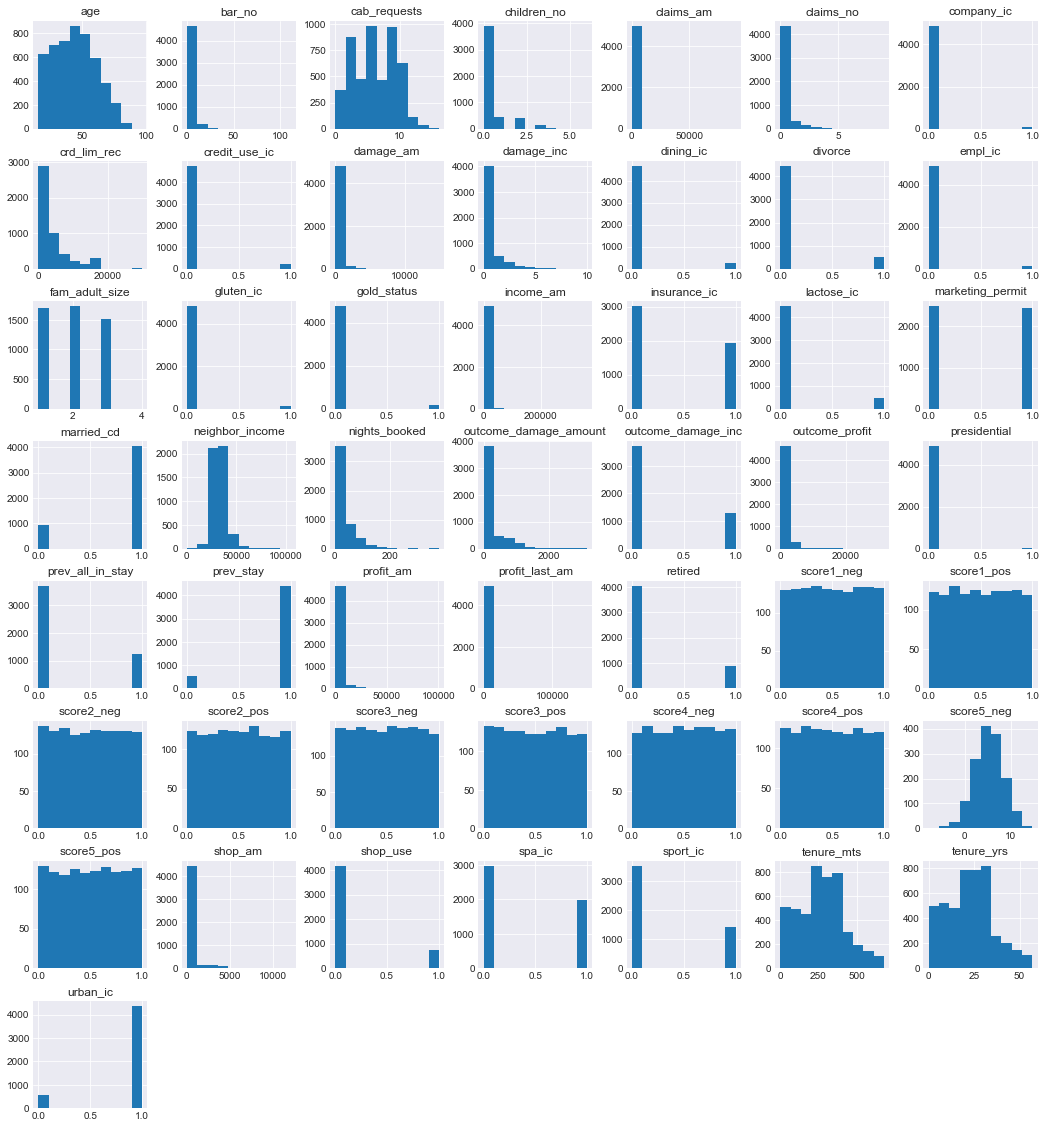

In [15]:
df.hist(figsize=(18,20))

__note:__ the following features contain outliers:
* income_am     
* profit_last_am     
* profit_am     
* damage_am     
* damage_inc     
* crd_lim_rec
* claims_no
* claim_am
* nights_booked
* shop_am

but we don't concider them as a problem because these are exceptional but make sense

#### 1.4.2. Make barplots for the catergorical features: which features have sparse classes?

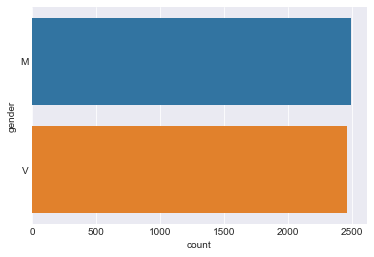

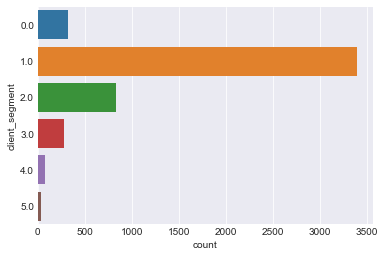

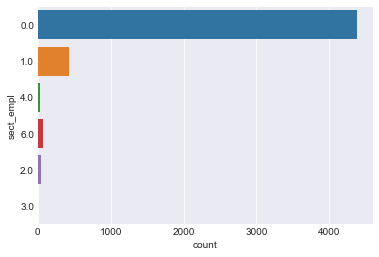

In [16]:
import seaborn as sns
for i in cat_cols: 
    sns.countplot(y=df[i])
    plt.show()

__note:__ there are no sparse classes

#### 1.5. Study the associations
* we plot the association of all features with the outcome

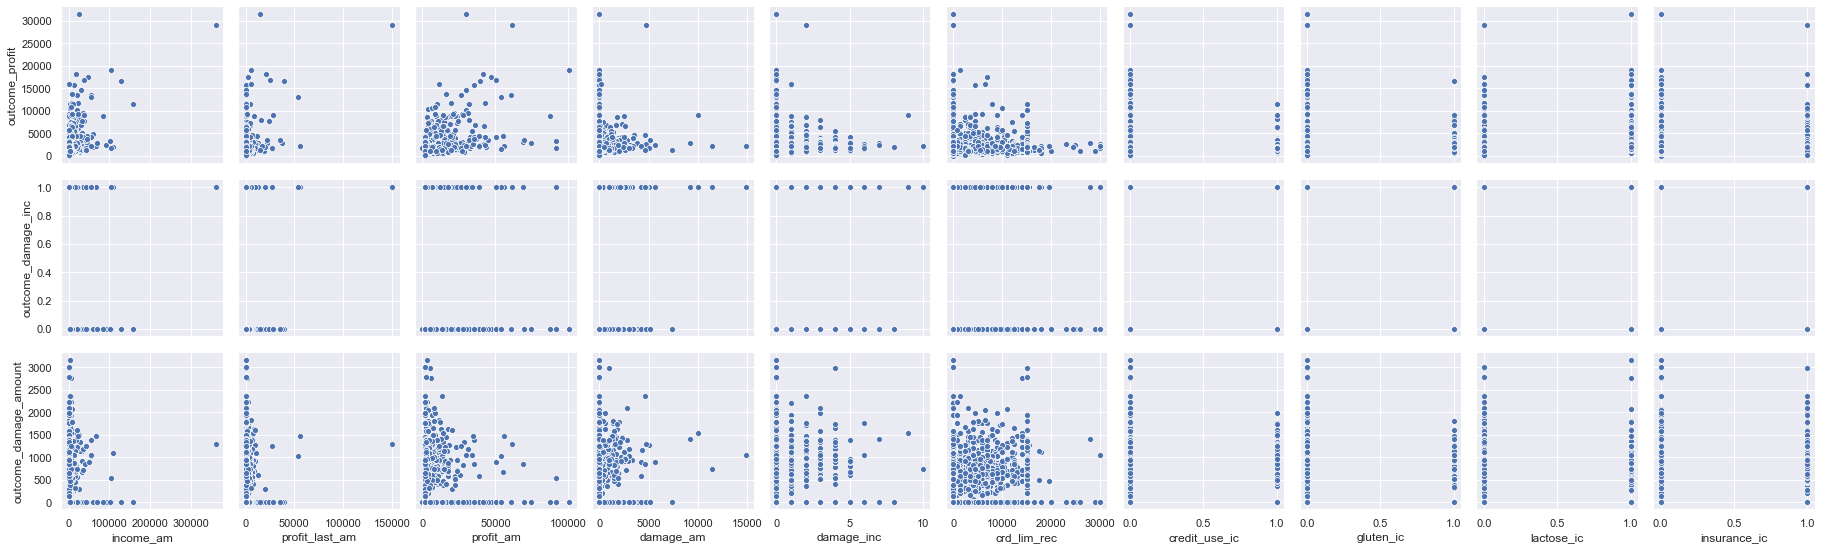

In [17]:
sns.set()
features = df.copy()
features = features.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],1)
xvars = features.columns
sns.pairplot(df, y_vars=['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],x_vars=xvars[0:10])
plt.show();

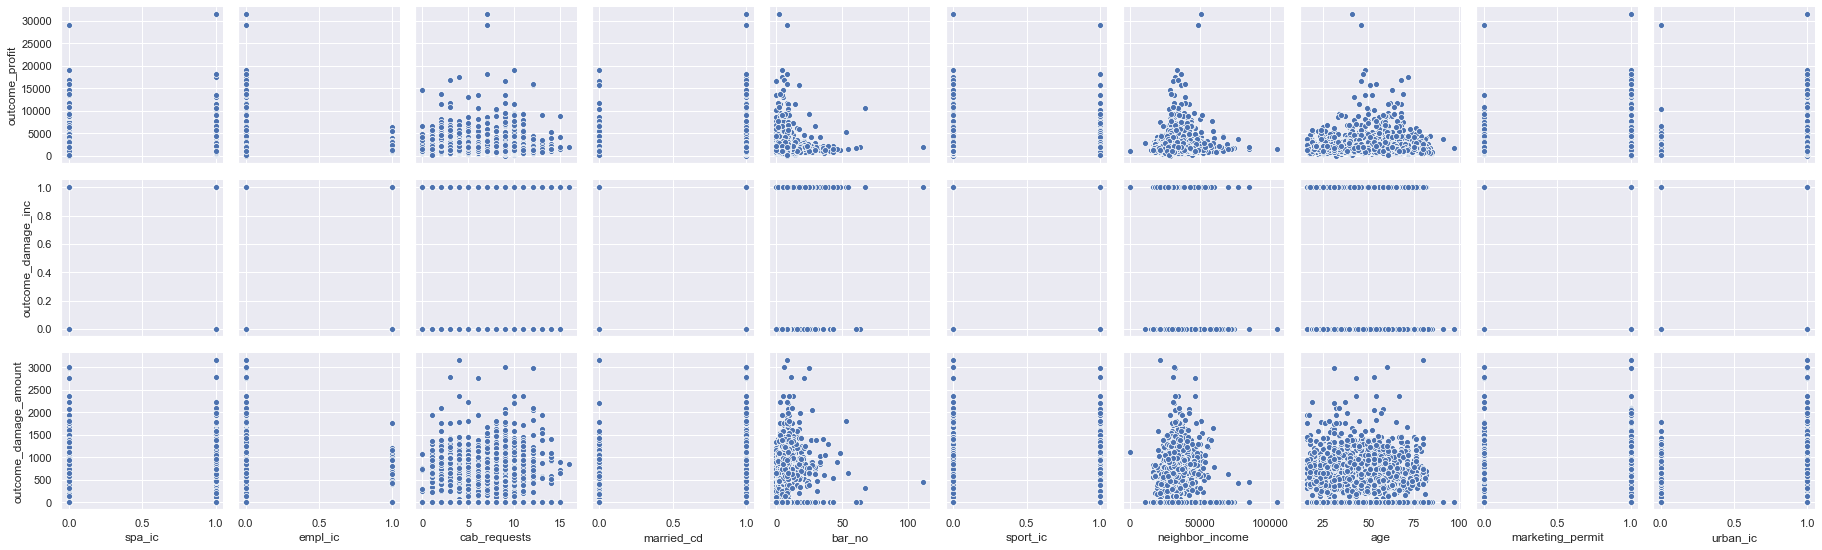

In [18]:
sns.pairplot(df, y_vars=['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],x_vars=xvars[10:20])
plt.show();

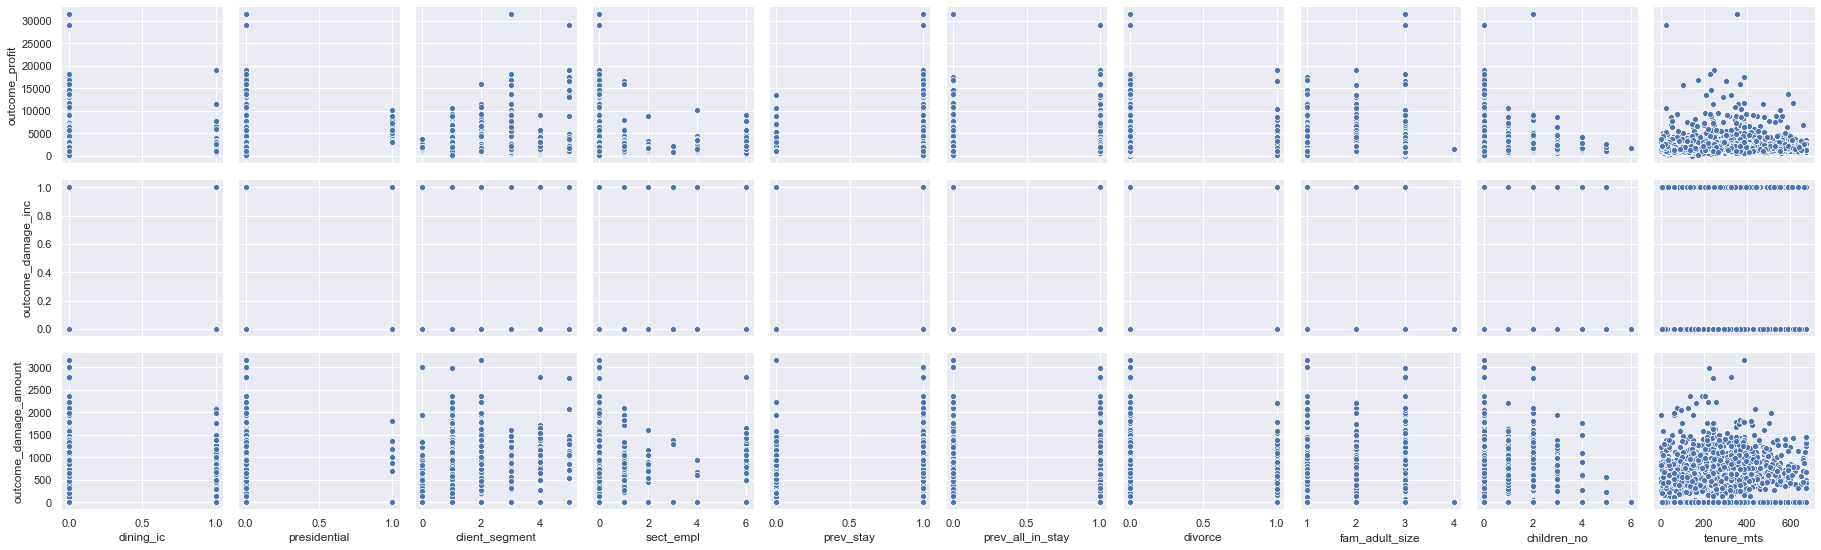

In [19]:
sns.pairplot(df, y_vars=['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],x_vars=xvars[20:30])
plt.show();

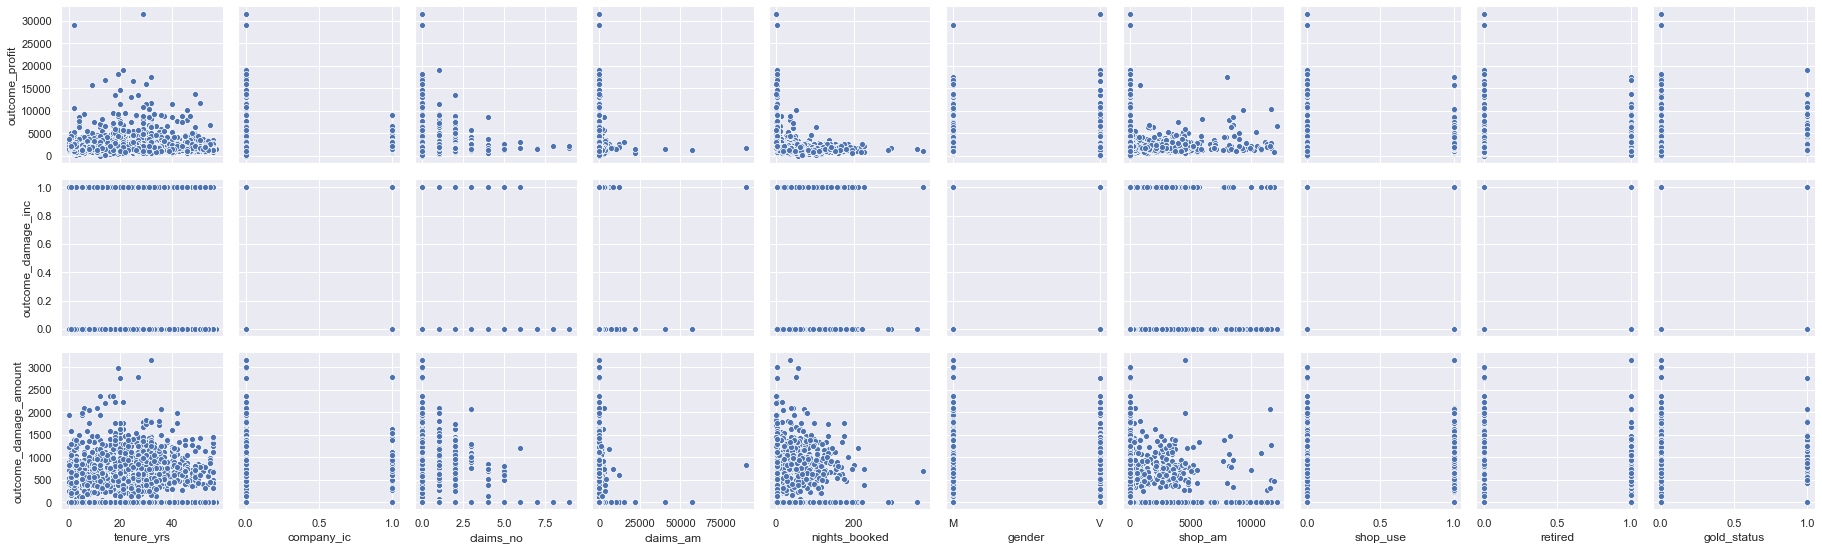

In [20]:
sns.pairplot(df, y_vars=['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],x_vars=xvars[30:40])
plt.show();

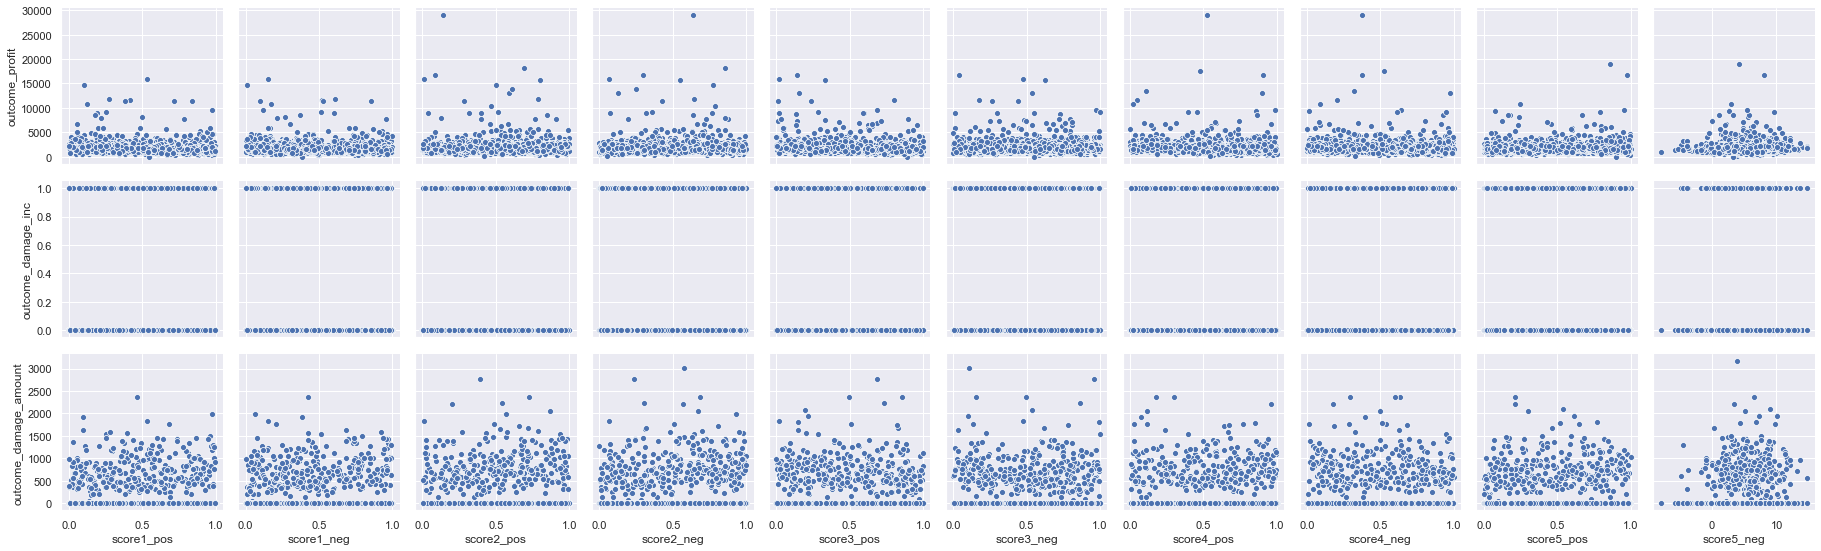

In [21]:
sns.pairplot(df, y_vars=['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'],x_vars=xvars[40:50])
plt.show();

#### 1.6. Look at all correlations
* We use a heatmap to do this

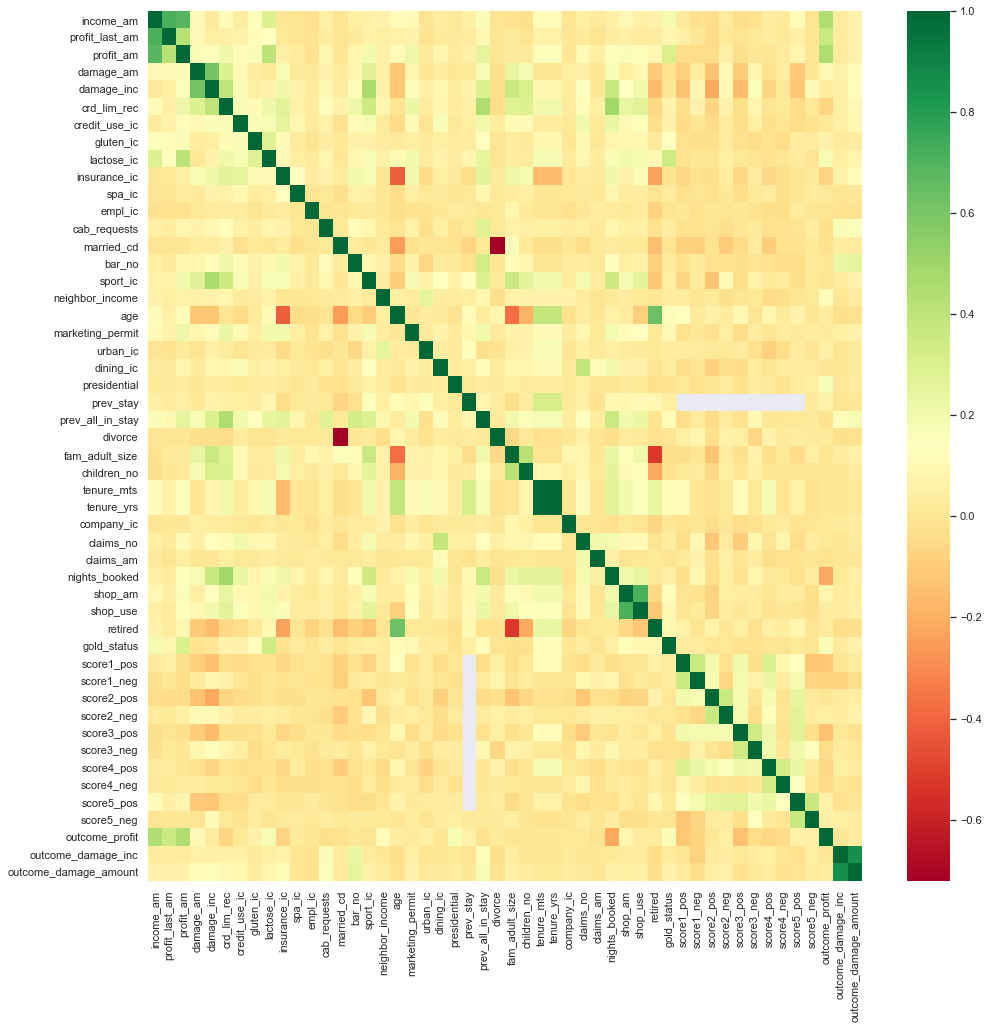

In [22]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corrmat, cmap='RdYlGn');

### _2. Data cleaning_

#### 2.1. Remove unwanted observations and features
* Remove duplicated observations
* Remove irrelevant observations
* Remove irrelevant/leaky features

#### 2.1.1. Remove duplicated observations

In [23]:
df_no_dup = df.copy()
df_no_dup.drop_duplicates()
print(df_no_dup.shape)

df_test_no_dup = df_test.copy()
df_test_no_dup.drop_duplicates()
print(df_test_no_dup.shape)

(5000, 53)
(500, 50)


There were no duplicates in both dataframes

#### 2.1.2. Remove irrelevant observations

We remove tenure_yrs because the data is good as same as tenure_mts.

We won't be using "features_no_dup" because there were no duplicates.

In [24]:
df_no_irrob = df.copy()
df_no_irrob = df_no_irrob.drop(['tenure_yrs'],1)

df_no_irrob_test = df_test.copy()
df_no_irrob_test = df_no_irrob_test.drop(['tenure_yrs'],1)

#### 2.2. Fix structural errors
'score5_neg' has strange values that we don't know if they are correct. It's ethical not correct to use this values and we cant contact the hotel of this scores to ask them about it. conclusion: we will delete this column.

In [25]:
df_no_neg5 = df_no_irrob.copy()
df_no_neg5 = df_no_neg5.drop(['score5_neg'],1)

df_no_neg5_test = df_no_irrob_test.copy()
df_no_neg5_test = df_no_neg5_test.drop(['score5_neg'],1)

We see a lot of missing data in the score features. We fix this by merging them into 'score_pos' and 'score_neg'. We fill this features with the mean of current features excluding Nan values.

In [26]:
import warnings

df_merged_score = df_no_neg5.copy()
df_merged_score_test = df_no_neg5_test.copy()

pos = ['score1_pos', 'score2_pos', 'score3_pos', 'score4_pos', 'score5_pos' ]
neg = ['score1_neg', 'score2_neg', 'score3_neg', 'score4_neg']

# We expect to see RuntimeWarnings in this block
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    #np.nanmean() calculates the mean excluding nan values 
    df_merged_score['score_pos'] = np.nanmean(df_merged_score[pos], axis=1)
    df_merged_score['score_neg'] = np.nanmean(df_merged_score[neg], axis=1)
    df_merged_score_test['score_pos'] = np.nanmean(df_merged_score_test[pos], axis=1)
    df_merged_score_test['score_neg'] = np.nanmean(df_merged_score_test[neg], axis=1)
    
df_merged_score = df_merged_score.drop(neg + pos,1)
df_merged_score_test = df_merged_score_test.drop(neg + pos,1)

#### 2.3. Deal with unwanted outliers
__note:__ as we stated in 1.3.1. we don't concider the outliers as a problem because they are exceptional but make sense.

#### 2.4. Handling missing data

#### 2.4.1. Finding missingness

In [27]:
df_merged_score.isnull().sum()[df_merged_score.isnull().sum() != 0]

income_am             53
profit_last_am        53
profit_am             53
damage_am             46
damage_inc            53
crd_lim_rec           53
credit_use_ic         53
gluten_ic             53
lactose_ic            53
insurance_ic          53
spa_ic                30
empl_ic                1
cab_requests          88
bar_no                53
sport_ic              53
neighbor_income      239
age                   53
marketing_permit      53
urban_ic              53
dining_ic             88
presidential          88
client_segment        53
sect_empl             53
prev_stay             53
prev_all_in_stay      53
divorce               53
fam_adult_size        53
children_no           53
tenure_mts           392
company_ic            53
claims_no             53
claims_am             27
nights_booked         53
gender                53
shop_am               53
shop_use              88
retired               53
gold_status           53
score_pos           1597
score_neg           1624


In [28]:
df_merged_score_test.isnull().sum()[df_merged_score_test.isnull().sum() != 0]

income_am             4
profit_last_am        4
profit_am             4
damage_am             3
damage_inc            4
crd_lim_rec           4
credit_use_ic         4
gluten_ic             4
lactose_ic            4
insurance_ic          4
spa_ic                2
cab_requests          5
bar_no                4
sport_ic              4
neighbor_income      21
age                   4
marketing_permit      4
urban_ic              4
dining_ic             5
presidential          5
client_segment        4
sect_empl             4
prev_stay             4
prev_all_in_stay      4
divorce               4
fam_adult_size        4
children_no           4
tenure_mts           39
company_ic            4
claims_no             4
claims_am             1
nights_booked         4
gender                4
shop_am               4
shop_use              5
retired               4
gold_status           4
score_pos           152
score_neg           160
dtype: int64

#### 2.4.2. continuous features


We see a lot of features with 53x missingness in the train data and a missingness of 4 at the same features in the test dataset. So we pick one and investigate if we have to deal with the same observations.

In [29]:
missing_data = df_merged_score[df_merged_score['income_am'].isnull()]
print(missing_data)

      income_am  profit_last_am  profit_am  damage_am  damage_inc  \
90          NaN             NaN        NaN        0.0         NaN   
306         NaN             NaN        NaN        NaN         NaN   
474         NaN             NaN        NaN        NaN         NaN   
517         NaN             NaN        NaN        NaN         NaN   
670         NaN             NaN        NaN        NaN         NaN   
790         NaN             NaN        NaN        NaN         NaN   
996         NaN             NaN        NaN        NaN         NaN   
1062        NaN             NaN        NaN        NaN         NaN   
1164        NaN             NaN        NaN        NaN         NaN   
1261        NaN             NaN        NaN        NaN         NaN   
1275        NaN             NaN        NaN        0.0         NaN   
1281        NaN             NaN        NaN        NaN         NaN   
1338        NaN             NaN        NaN        NaN         NaN   
1448        NaN             NaN   

In [30]:
missing_data_test = df_merged_score_test[df_merged_score_test['income_am'].isnull()]
print(missing_data_test)

     income_am  profit_last_am  profit_am  damage_am  damage_inc  crd_lim_rec  \
311        NaN             NaN        NaN        0.0         NaN          NaN   
320        NaN             NaN        NaN        NaN         NaN          NaN   
409        NaN             NaN        NaN        NaN         NaN          NaN   
421        NaN             NaN        NaN        NaN         NaN          NaN   

     credit_use_ic  gluten_ic  lactose_ic  insurance_ic  ...  claims_no  \
311            NaN        NaN         NaN           NaN  ...        NaN   
320            NaN        NaN         NaN           NaN  ...        NaN   
409            NaN        NaN         NaN           NaN  ...        NaN   
421            NaN        NaN         NaN           NaN  ...        NaN   

     claims_am  nights_booked  gender  shop_am  shop_use  retired  \
311        0.0            NaN     NaN      NaN       NaN      NaN   
320        NaN            NaN     NaN      NaN       NaN      NaN   
409        

All data of this observations is missing except our outcomes. They have no contribution to our investigation, so we'll delete them.

In [31]:
df_merged_score = df_merged_score.drop(missing_data.index.values)
df_merged_score_test = df_merged_score_test.drop(missing_data_test.index.values)

print(df_merged_score.isnull().sum()[df_merged_score.isnull().sum() != 0])
df_merged_score_test.isnull().sum()[df_merged_score_test.isnull().sum() != 0]

cab_requests         35
neighbor_income     186
dining_ic            35
presidential         35
tenure_mts          339
shop_use             35
score_pos          1544
score_neg          1571
dtype: int64


cab_requests         1
neighbor_income     17
dining_ic            1
presidential         1
tenure_mts          35
shop_use             1
score_pos          148
score_neg          156
dtype: int64

Now we see several features with a missingness of 35 in our training dataset and a missingness of 1 in our test dataset


In [32]:
missing_data2 = df_merged_score[df_merged_score['cab_requests'].isnull()]
print(missing_data2)

      income_am  profit_last_am  profit_am  damage_am  damage_inc  \
7         227.0             0.0     1620.0        0.0         0.0   
605       227.0             0.0     1620.0        0.0         0.0   
627       227.0             0.0     1620.0        0.0         0.0   
781       227.0             0.0     1620.0        0.0         0.0   
863       227.0             0.0     1620.0        0.0         0.0   
1021      227.0             0.0     1620.0        0.0         0.0   
1267      227.0             0.0     1620.0        0.0         0.0   
1409      227.0             0.0     1620.0        0.0         0.0   
1514      227.0           810.0     1620.0        0.0         0.0   
1557      227.0             0.0     1620.0        0.0         0.0   
1566      227.0             0.0     1620.0        0.0         0.0   
1782      227.0             0.0     1620.0        0.0         0.0   
2387      227.0             0.0     1620.0        0.0         0.0   
2504      227.0             0.0   

In [33]:
missing_data2_test = df_merged_score_test[df_merged_score_test['cab_requests'].isnull()]
print(missing_data2_test)

     income_am  profit_last_am  profit_am  damage_am  damage_inc  crd_lim_rec  \
183      227.0             0.0     1620.0        0.0         0.0          0.0   

     credit_use_ic  gluten_ic  lactose_ic  insurance_ic  ...  claims_no  \
183            0.0        0.0         0.0           0.0  ...        0.0   

     claims_am  nights_booked  gender  shop_am  shop_use  retired  \
183        0.0            4.0       V      0.0       NaN      0.0   

     gold_status  score_pos  score_neg  
183          0.0        NaN        NaN  

[1 rows x 41 columns]


__Note__: We see a lot of repetition in this data too, so we consider it useless as well.

In [34]:
df_merged_score = df_merged_score.drop(missing_data2.index.values)
df_merged_score_test = df_merged_score_test.drop(missing_data2_test.index.values)

print(df_merged_score.isnull().sum()[df_merged_score.isnull().sum() != 0])
df_merged_score_test.isnull().sum()[df_merged_score_test.isnull().sum() != 0]

neighbor_income     185
tenure_mts          309
score_pos          1513
score_neg          1563
dtype: int64


neighbor_income     17
tenure_mts          34
score_pos          147
score_neg          155
dtype: int64

Now, we will first create new features that flags the missingness in the features.

In [36]:
df_merged_score[['missing_score_pos', 'missing_score_neg', 'neighbor_income']] = df_merged_score[['score_pos', 'score_neg', 'neighbor_income']].isnull().astype('uint8')
df_merged_score_test[['missing_score_pos', 'missing_score_neg', 'neighbor_income']] = df_merged_score_test[['score_pos', 'score_neg', 'neighbor_income']].isnull().astype('uint8')

Now, we'll fill the missingness with the mean of the training dataset 

In [37]:
from sklearn.impute import KNNImputer

df_imputed = df_merged_score.copy()
df_imputed_test = df_merged_score_test.copy()

cols = ['tenure_mts', 'score_pos', 'score_neg', 'neighbor_income']

mean_imputer = KNNImputer(n_neighbors=2)

df_imputed[cols] = mean_imputer.fit_transform(df_imputed[cols])
df_imputed_test[cols] = mean_imputer.fit_transform(df_imputed_test[cols])
    
df_imputed.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount,score_pos,score_neg,missing_score_pos,missing_score_neg
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1791.66,0,0.00,0.652958,0.532814,0,0
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1672.78,1,829.66,0.664254,0.764319,1,1
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1001.40,0,0.00,0.167165,0.099529,0,0
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1785.59,0,0.00,0.659507,0.889793,1,0
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3140.74,0,0.00,0.410495,0.654370,0,0


A last control on missing data

In [38]:
print(df_imputed.isnull().sum()[df_imputed.isnull().sum() != 0])
df_imputed_test.isnull().sum()[df_imputed_test.isnull().sum() != 0]

Series([], dtype: int64)


Series([], dtype: int64)

#### 2.4.2. categorical features
__note:__ normaly, we add features for the missing data in the categorical features, but there is no missingness in it.

### 3. Feature engineering

#### 3.1. one hot encoding of gender, client_segment and sect_empl


There is no client in the score dataset, so we'll have to add 'sect_empl_3.0' hard coded in the test data.

In [39]:
dummies = pd.get_dummies(df_imputed['gender'], dummy_na=False, prefix= 'gender')
df_imputed = pd.concat([df_imputed, dummies], axis=1)
df_imputed.drop(columns=['gender'], inplace=True)

dummies_test = pd.get_dummies(df_imputed_test['gender'], dummy_na=False, prefix='gender')
df_imputed_test = pd.concat([df_imputed_test, dummies_test], axis=1)
df_imputed_test.drop(columns=['gender'], inplace=True)

dummies = pd.get_dummies(df_imputed['client_segment'], dummy_na=False, prefix= 'client_segment')
df_imputed = pd.concat([df_imputed, dummies], axis=1)
df_imputed.drop(columns=['client_segment'], inplace=True)

dummies_test = pd.get_dummies(df_imputed_test['client_segment'], dummy_na=False, prefix='client_segment')
df_imputed_test = pd.concat([df_imputed_test, dummies_test], axis=1)
df_imputed_test.drop(columns=['client_segment'], inplace=True)

dummies = pd.get_dummies(df_imputed['sect_empl'], dummy_na=False, prefix= 'sect_empl')
df_imputed = pd.concat([df_imputed, dummies], axis=1)
df_imputed.drop(columns=['sect_empl'], inplace=True)

dummies_test = pd.get_dummies(df_imputed_test['sect_empl'], dummy_na=False, prefix='sect_empl')
dummies_test['sect_empl_3.0'] = 0
df_imputed_test = pd.concat([df_imputed_test, dummies_test], axis=1)
df_imputed_test.drop(columns=['sect_empl'], inplace=True)



In [40]:
df_imputed.info()
df_imputed.iloc[:, 38:].describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 0 to 4999
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4912 non-null   float64
 1   profit_last_am         4912 non-null   float64
 2   profit_am              4912 non-null   float64
 3   damage_am              4912 non-null   float64
 4   damage_inc             4912 non-null   float64
 5   crd_lim_rec            4912 non-null   float64
 6   credit_use_ic          4912 non-null   float64
 7   gluten_ic              4912 non-null   float64
 8   lactose_ic             4912 non-null   float64
 9   insurance_ic           4912 non-null   float64
 10  spa_ic                 4912 non-null   float64
 11  empl_ic                4912 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             4912 non-null   float64
 14  bar_no                 4912 non-null   float64
 15  spor

,outcome_damage_amount,score_pos,score_neg,missing_score_pos,missing_score_neg,gender_M,gender_V,client_segment_0.0,client_segment_1.0,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0
count,4912.000000,4912.000000,4.912000e+03,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000
mean,190.588758,0.502156,5.318472e-01,0.308021,0.318200,0.506107,0.493893,0.059039,0.689129,0.169992,0.057818,0.016490,0.007533,0.882940,0.088151,0.008550,0.000611,0.005293,0.014454
std,379.491987,0.226153,2.487214e-01,0.461722,0.465825,0.500014,0.500014,0.235722,0.462897,0.375664,0.233422,0.127364,0.086472,0.321525,0.283544,0.092082,0.024708,0.072569,0.119367
min,0.000000,0.000705,1.000000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.335981,3.278398e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.510565,5.353266e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,210.530000,0.659507,7.643189e-01,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3157.240000,0.999285,9.993125e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 3.2.Do log-transformation if necessary

In [41]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 0 to 4999
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4912 non-null   float64
 1   profit_last_am         4912 non-null   float64
 2   profit_am              4912 non-null   float64
 3   damage_am              4912 non-null   float64
 4   damage_inc             4912 non-null   float64
 5   crd_lim_rec            4912 non-null   float64
 6   credit_use_ic          4912 non-null   float64
 7   gluten_ic              4912 non-null   float64
 8   lactose_ic             4912 non-null   float64
 9   insurance_ic           4912 non-null   float64
 10  spa_ic                 4912 non-null   float64
 11  empl_ic                4912 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             4912 non-null   float64
 14  bar_no                 4912 non-null   float64
 15  spor

In [42]:
df_imputed_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 499
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   income_am           495 non-null    float64
 1   profit_last_am      495 non-null    float64
 2   profit_am           495 non-null    float64
 3   damage_am           495 non-null    float64
 4   damage_inc          495 non-null    float64
 5   crd_lim_rec         495 non-null    float64
 6   credit_use_ic       495 non-null    float64
 7   gluten_ic           495 non-null    float64
 8   lactose_ic          495 non-null    float64
 9   insurance_ic        495 non-null    float64
 10  spa_ic              495 non-null    float64
 11  empl_ic             495 non-null    float64
 12  cab_requests        495 non-null    float64
 13  married_cd          495 non-null    float64
 14  bar_no              495 non-null    float64
 15  sport_ic            495 non-null    float64
 16  neighbor

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B3893B6A0>,
      dtype=object)

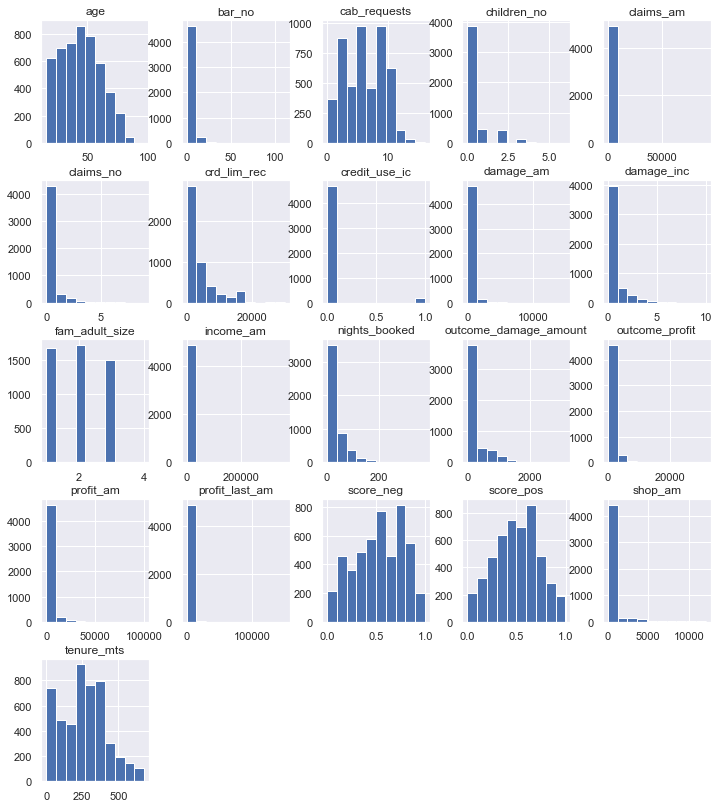

In [43]:
num = ['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc', 'crd_lim_rec', 'credit_use_ic', 'cab_requests', 'bar_no', 'age', 'fam_adult_size', 'children_no', 'tenure_mts', 'claims_no', 'claims_am', 'nights_booked', 'shop_am', 'score_pos', 'score_neg', 'outcome_profit', 'outcome_damage_amount']
df_imputed[num].hist( figsize = (12,14))

In [45]:
from scipy.stats import skew
skewed = df_imputed[num].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
df_imputed[skewed] = np.log1p(df_imputed[skewed])

num_wout_outcome = [e for e in num if e not in ('outcome_profit', 'outcome_damage_amount')]

skewed_test = df_imputed_test[num_wout_outcome].apply(lambda x: skew(x.dropna().astype(float)))
skewed_test = skewed_test[skewed_test > 0.75]
skewed_test = skewed_test.index
df_imputed_test[skewed_test] = np.log1p(df_imputed_test[skewed_test])


We'll scale all features, so the features with a broader range won't dominate our algorithm. We Won't fit the test data because the scaling object needs to be exact same transformation for future data.

In [46]:
print(df_imputed['outcome_profit'])

0       7.491456
1       7.422840
2       6.910152
3       7.488064
4       8.052532
          ...   
4995    7.684241
4996    6.964920
4997    5.245813
4998    7.530700
4999    6.982631
Name: outcome_profit, Length: 4912, dtype: float64


In [47]:
df_scaled = df_imputed.copy()
df_scaled_test = df_imputed_test.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_scaled[num_wout_outcome])
df_scaled[num_wout_outcome]= scaler.fit_transform(df_scaled[num_wout_outcome])
df_scaled_test[num_wout_outcome] = scaler.transform(df_scaled_test[num_wout_outcome])


Now we are going to shuffle the data to be sure there won't be any specefic order in our data.

In [48]:
df_shuffle = df_scaled.sample(frac=1)
df_shuffle_test = df_scaled_test.sample(frac=1)

Export the data

In [49]:
df_shuffle.to_csv('train_V2_cleaned.csv')
df_shuffle_test.to_csv('score_cleaned.csv')

PermissionError: [Errno 13] Permission denied: 'train_V2_cleaned.csv'